In [1]:
import ROOT as root

from array import array

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

import sys

from modules.fit.muondecay_analysis import MuonDecay_Analysis

from modules.fit.muondecay_fit import MuonDecay_Fit

Welcome to JupyROOT 6.26/02


In [2]:
folder = '../data/20220428_192049/'

In [3]:
branches = [
            'x_peak_0',
            'x_peak_1',
            'y_peak_0',
            'y_peak_1',
            'integral_0',
            'integral_1'
        ]

x_labels = [
    'x_peak_0 (micro-sec)',
    'x_peak_1 (micro-sec)',
    'y_peak_0 (mV)',
    'y_peak_1 (mV)',
    'integrals_0 ()',
    'integrals_1 ()'
]

In [4]:
i = 0

In [5]:
root_file_path = f'{folder}muondecay/results/results.root'
results_path   = f'{folder}muondecay/results'
tree_name      = 'results'
branch_name    = branches[i]
x_label        = x_labels[i]
y_label        = 'counts'
numberbins     = 50

In [6]:
file = root.TFile.Open(root_file_path)

tree = file.Get(tree_name)

branch_var = array('f', [0])

tree.SetBranchAddress(branch_name, branch_var)

4

In [7]:
#----------------------------------------------------------------------------------------------------
values = []

for _ in range(tree.GetEntries()):

    tree.GetEntry(_)

    values.append(branch_var[0])

values = pd.DataFrame(values, columns=[branch_name])

In [8]:
values

,x_peak_0
0,1.020
1,1.020
2,1.016
3,1.016
4,1.016
...,...
3919,1.016
3920,1.016
3921,1.016
3922,1.016


Text(0, 0.5, 'counts')

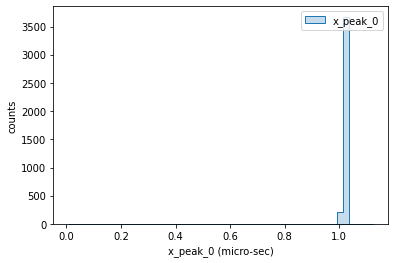

In [9]:
sns.histplot(
        data   = values,
        bins   = 50,
        color  = 'k',
        fill   = True,
        element = 'step'
        )
    


plt.xlabel(x_label)

plt.ylabel(y_label)

In [10]:
def Graph_Results(

    root_file_path:   "str" = './results.root',

    results_path:     "str" = './results',

    tree_name:        "str" = 'results',

    branch_name:      "str" = 'y_peak_0',

    x_label:          "str" = 'xlabel',

    y_label:          "str" = 'ylabel',

    numberbins:       "int" = 50

    ) -> "int":


    #----------------------------------------------------------------------------------------------------
    file = root.TFile.Open(root_file_path)

    tree = file.Get(tree_name)

    branch_var = array('f', [0])

    tree.SetBranchAddress(branch_name, branch_var)


    #----------------------------------------------------------------------------------------------------
    values = []

    for _ in range(tree.GetEntries()):

        tree.GetEntry(_)

        values.append(branch_var[0])

    values = pd.DataFrame(values, columns=[branch_name])


    #----------------------------------------------------------------------------------------------------
    sns.histplot(
        data   = values,
        bins   = numberbins,
        color  = 'k',
        fill   = False,
        element = 'step'

        )

    plt.xlabel(x_label)

    plt.ylabel(y_label)

    plt.savefig(f"{results_path}/{branch_name}.jpeg", dpi=150)

    file.Close()

    return 0

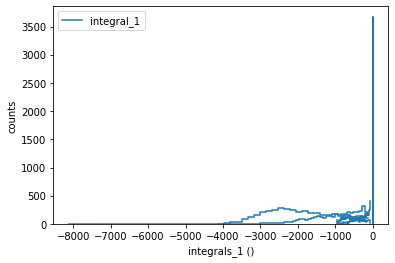

In [19]:
for i in range(len(branches)):

    Graph_Results(
                root_file_path = f'{folder}/muondecay/results/results.root',
                results_path   = f'{folder}/muondecay/results',
                tree_name      = 'results',
                branch_name    = branches[i],
                x_label        = x_labels[i],
                y_label        = 'counts',
                numberbins     = 50
                )

In [12]:
i

0